In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Problem 1: Clustering

### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [3]:
df_bank=pd.read_csv('bank_marketing_part1_Data.csv')

In [19]:
df_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [5]:
df_bank.shape

(210, 7)

In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [8]:
df_bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [11]:
df_bank.duplicated().sum()

0

In [12]:
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


The skewness for Spending is: 0.3998891917177586


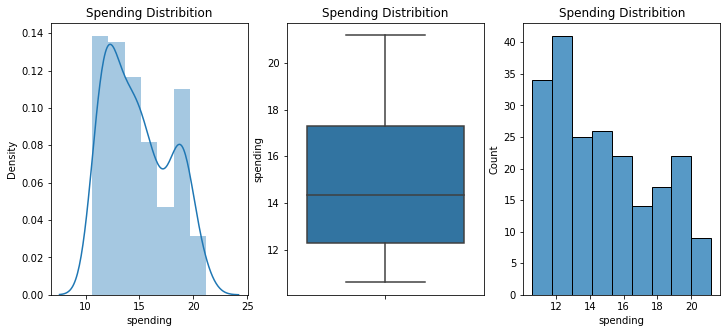

In [18]:
print('The skewness for Spending is:',df_bank['spending'].skew())
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,5))
sns.distplot(df_bank['spending'],kde=True, ax=ax1)
sns.boxplot(y='spending', data=df_bank, ax=ax2)
sns.histplot(df_bank['spending'] , kde=False, ax=ax3)
ax1.set_title('Spending Distribition')
ax2.set_title('Spending Distribition')
ax3.set_title('Spending Distribition')             

plt.show()

In [28]:
print('Minimum spending: ', df_bank['spending'].min())
print('Maximum spending: ',df_bank['spending'].max())
print('Mean value: ', df_bank['spending'].mean())
print('Median value: ',df_bank['spending'].median())
print('Standard deviation: ',df_bank['spending'].std())
print('Null values: ',df_bank['spending'].isnull().any())

Minimum spending:  10.59
Maximum spending:  21.18
Mean value:  14.847523809523818
Median value:  14.355
Standard deviation:  2.909699430687361
Null values:  False


In [30]:
# IQR=Q3-Q1
#lower = Q1-1.5*IQR
#upper = Q3+1.5*IQR
Q1=df_bank['spending'].quantile(q=0.25)
Q3=df_bank['spending'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in spending: ', L_outliers)
print('Upper outliers in spending: ', U_outliers)
print('Number of outliers in spending upper : ', df_bank[df_bank['spending']>24.8575]['spending'].count())
print('Number of outliers in spending lower : ', df_bank[df_bank['spending']<4.717499]['spending'].count())

Lower outliers in spending:  4.717499999999999
Upper outliers in spending:  24.8575
Number of outliers in spending upper :  0
Number of outliers in spending lower :  0


The skewness for advance_payments is: 0.3865727731912213


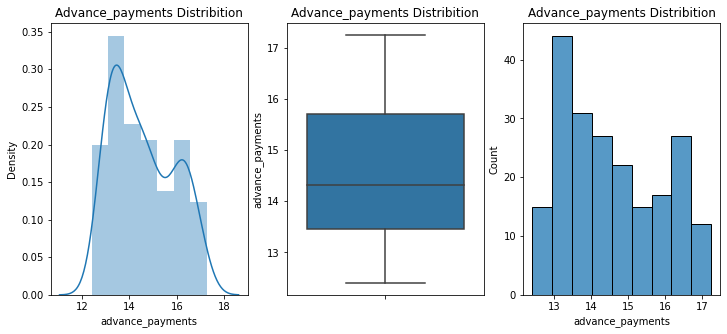

In [21]:
print('The skewness for advance_payments is:',df_bank['advance_payments'].skew())
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,5))
sns.distplot(df_bank['advance_payments'],kde=True, ax=ax1)
sns.boxplot(y='advance_payments', data=df_bank, ax=ax2)
sns.histplot(df_bank['advance_payments'] , kde=False, ax=ax3)
ax1.set_title('Advance_payments Distribition')
ax2.set_title('Advance_payments Distribition')
ax3.set_title('Advance_payments Distribition')             

plt.show()

In [32]:
print('Minimum advance_payments: ', df_bank['advance_payments'].min())
print('Maximum advance_payments: ',df_bank['advance_payments'].max())
print('Mean value: ', df_bank['advance_payments'].mean())
print('Median value: ',df_bank['advance_payments'].median())
print('Standard deviation: ',df_bank['advance_payments'].std())
print('Null values: ',df_bank['advance_payments'].isnull().any())

Minimum advance_payments:  12.41
Maximum advance_payments:  17.25
Mean value:  14.559285714285727
Median value:  14.32
Standard deviation:  1.305958726564022
Null values:  False


In [34]:
# IQR=Q3-Q1
#lower = Q1-1.5*IQR
#upper = Q3+1.5*IQR
Q1=df_bank['advance_payments'].quantile(q=0.25)
Q3=df_bank['advance_payments'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in advance_payments: ', L_outliers)
print('Upper outliers in advance_payments: ', U_outliers)
print('Number of outliers in advance_payments upper : ', df_bank[df_bank['advance_payments']>19.1125]['advance_payments'].count())
print('Number of outliers in advance_payments lower : ', df_bank[df_bank['advance_payments']<10.0524]['advance_payments'].count())

Lower outliers in advance_payments:  10.052499999999998
Upper outliers in advance_payments:  19.1125
Number of outliers in advance_payments upper :  0
Number of outliers in advance_payments lower :  0


The skewness for probability_of_full_payment is: -0.5379537283982823


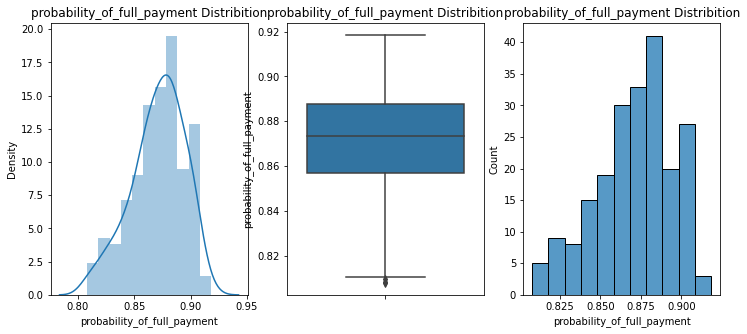

In [22]:
print('The skewness for probability_of_full_payment is:',df_bank['probability_of_full_payment'].skew())
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,5))
sns.distplot(df_bank['probability_of_full_payment'],kde=True, ax=ax1)
sns.boxplot(y='probability_of_full_payment', data=df_bank, ax=ax2)
sns.histplot(df_bank['probability_of_full_payment'] , kde=False, ax=ax3)
ax1.set_title('probability_of_full_payment Distribition')
ax2.set_title('probability_of_full_payment Distribition')
ax3.set_title('probability_of_full_payment Distribition')             

plt.show()

In [37]:
print('Minimum probability_of_full_payment: ', df_bank['probability_of_full_payment'].min())
print('Maximum probability_of_full_payment: ',df_bank['probability_of_full_payment'].max())
print('Mean value: ', df_bank['probability_of_full_payment'].mean())
print('Median value: ',df_bank['probability_of_full_payment'].median())
print('Standard deviation: ',df_bank['probability_of_full_payment'].std())
print('Null values: ',df_bank['probability_of_full_payment'].isnull().any())

Q1=df_bank['probability_of_full_payment'].quantile(q=0.25)
Q3=df_bank['probability_of_full_payment'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in probability_of_full_payment: ', L_outliers)
print('Upper outliers in probability_of_full_payment: ', U_outliers)
print('Number of outliers in probability_of_full_payment upper : ', df_bank[df_bank['probability_of_full_payment']>0.93408]['probability_of_full_payment'].count())
print('Number of outliers in probability_of_full_paymentlower : ', df_bank[df_bank['probability_of_full_payment']<0.81058]['probability_of_full_payment'].count())

Minimum probability_of_full_payment:  0.8081
Maximum probability_of_full_payment:  0.9183
Mean value:  0.8709985714285714
Median value:  0.8734500000000001
Standard deviation:  0.0236294165838465
Null values:  False
Lower outliers in probability_of_full_payment:  0.8105875
Upper outliers in probability_of_full_payment:  0.9340875
Number of outliers in probability_of_full_payment upper :  0
Number of outliers in probability_of_full_paymentlower :  3


The skewness for current_balance is: 0.5254815601318906


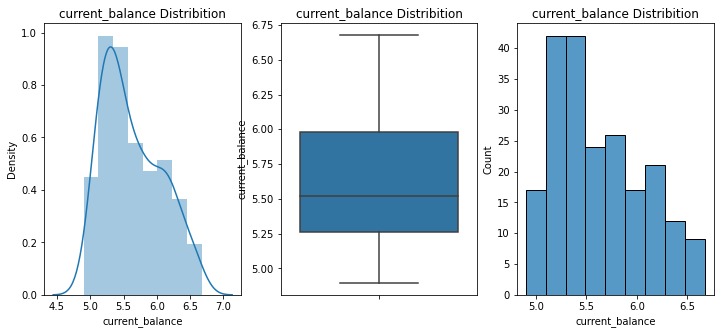

In [23]:
print('The skewness for current_balance is:',df_bank['current_balance'].skew())
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,5))
sns.distplot(df_bank['current_balance'],kde=True, ax=ax1)
sns.boxplot(y='current_balance', data=df_bank, ax=ax2)
sns.histplot(df_bank['current_balance'] , kde=False, ax=ax3)
ax1.set_title('current_balance Distribition')
ax2.set_title('current_balance Distribition')
ax3.set_title('current_balance Distribition')             

plt.show()

In [39]:
print('Minimum current_balance: ', df_bank['current_balance'].min())
print('Maximum current_balance: ',df_bank['current_balance'].max())
print('Mean value: ', df_bank['current_balance'].mean())
print('Median value: ',df_bank['current_balance'].median())
print('Standard deviation: ',df_bank['current_balance'].std())
print('Null values: ',df_bank['current_balance'].isnull().any())

Q1=df_bank['current_balance'].quantile(q=0.25)
Q3=df_bank['current_balance'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in current_balance: ', L_outliers)
print('Upper outliers in current_balance: ', U_outliers)
print('Number of outliers in current_balance upper : ', df_bank[df_bank['current_balance']>7.056]['current_balance'].count())
print('Number of outliers in current_balance lower : ', df_bank[df_bank['current_balance']<4.186]['current_balance'].count())

Minimum current_balance:  4.899
Maximum current_balance:  6.675
Mean value:  5.628533333333335
Median value:  5.5235
Standard deviation:  0.44306347772644944
Null values:  False
Lower outliers in current_balance:  4.186
Upper outliers in current_balance:  7.056000000000001
Number of outliers in current_balance upper :  0
Number of outliers in current_balance lower :  0


The skewness for credit_limit is: 0.1343782451316215


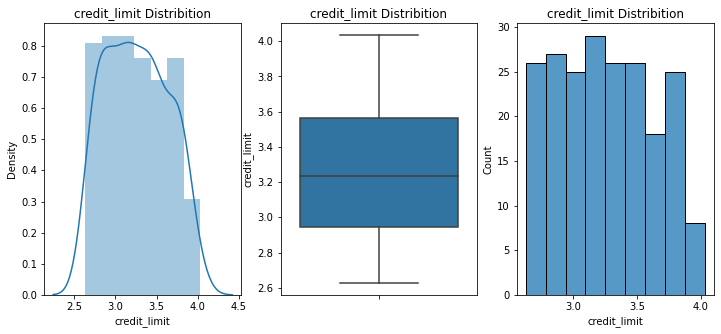

In [24]:
print('The skewness for credit_limit is:',df_bank['credit_limit'].skew())
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,5))
sns.distplot(df_bank['credit_limit'],kde=True, ax=ax1)
sns.boxplot(y='credit_limit', data=df_bank, ax=ax2)
sns.histplot(df_bank['credit_limit'] , kde=False, ax=ax3)
ax1.set_title('credit_limit Distribition')
ax2.set_title('credit_limit Distribition')
ax3.set_title('credit_limit Distribition')             

plt.show()

In [41]:
print('Minimum credit_limit: ', df_bank['credit_limit'].min())
print('Maximum credit_limit: ',df_bank['credit_limit'].max())
print('Mean value: ', df_bank['credit_limit'].mean())
print('Median value: ',df_bank['credit_limit'].median())
print('Standard deviation: ',df_bank['credit_limit'].std())
print('Null values: ',df_bank['credit_limit'].isnull().any())

Q1=df_bank['credit_limit'].quantile(q=0.25)
Q3=df_bank['credit_limit'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in credit_limit: ', L_outliers)
print('Upper outliers in credit_limit: ', U_outliers)
print('Number of outliers in credit_limit upper : ', df_bank[df_bank['credit_limit']>4.4884]['credit_limit'].count())
print('Number of outliers in credit_limit lower : ', df_bank[df_bank['credit_limit']<2.0174]['credit_limit'].count())

Minimum credit_limit:  2.63
Maximum credit_limit:  4.033
Mean value:  3.258604761904763
Median value:  3.237
Standard deviation:  0.37771444490658734
Null values:  False
Lower outliers in credit_limit:  2.017375
Upper outliers in credit_limit:  4.488375
Number of outliers in credit_limit upper :  0
Number of outliers in credit_limit lower :  0


The skewness for min_payment_amt is: 0.40166734329025183


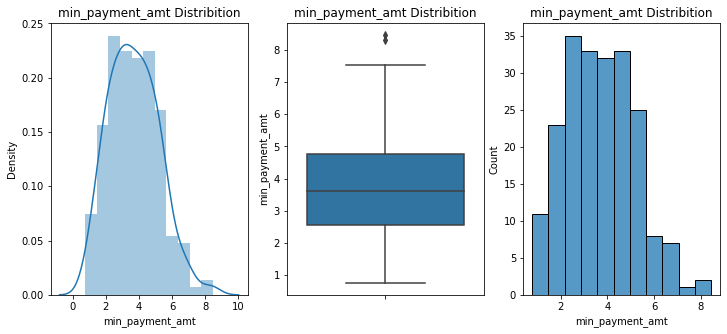

In [25]:
print('The skewness for min_payment_amt is:',df_bank['min_payment_amt'].skew())
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,5))
sns.distplot(df_bank['min_payment_amt'],kde=True, ax=ax1)
sns.boxplot(y='min_payment_amt', data=df_bank, ax=ax2)
sns.histplot(df_bank['min_payment_amt'] , kde=False, ax=ax3)
ax1.set_title('min_payment_amt Distribition')
ax2.set_title('min_payment_amt Distribition')
ax3.set_title('min_payment_amt Distribition')             

plt.show()

In [43]:
print('Minimum min_payment_amt: ', df_bank['min_payment_amt'].min())
print('Maximum min_payment_amt: ',df_bank['min_payment_amt'].max())
print('Mean value: ', df_bank['min_payment_amt'].mean())
print('Median value: ',df_bank['min_payment_amt'].median())
print('Standard deviation: ',df_bank['min_payment_amt'].std())
print('Null values: ',df_bank['min_payment_amt'].isnull().any())

Q1=df_bank['min_payment_amt'].quantile(q=0.25)
Q3=df_bank['min_payment_amt'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in min_payment_amt: ', L_outliers)
print('Upper outliers in min_payment_amt: ', U_outliers)
print('Number of outliers in min_payment_amt upper : ', df_bank[df_bank['min_payment_amt']>8.0796]['min_payment_amt'].count())
print('Number of outliers in min_payment_amt lower : ', df_bank[df_bank['min_payment_amt']<-0.7494]['min_payment_amt'].count())

Minimum min_payment_amt:  0.7651
Maximum min_payment_amt:  8.456
Mean value:  3.7002009523809503
Median value:  3.599
Standard deviation:  1.5035571308217792
Null values:  False
Lower outliers in min_payment_amt:  -0.7493749999999992
Upper outliers in min_payment_amt:  8.079625
Number of outliers in min_payment_amt upper :  2
Number of outliers in min_payment_amt lower :  0


The skewness for max_spent_in_single_shopping is: 0.561897374954866


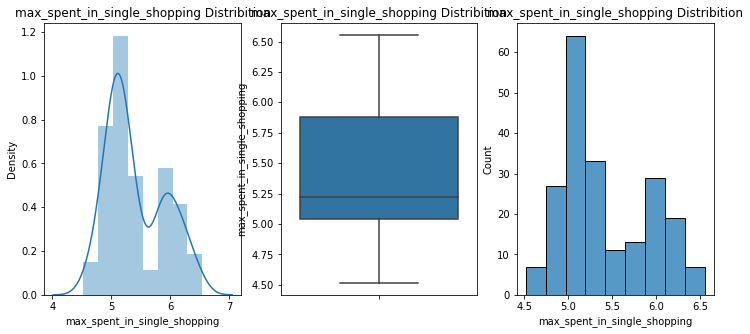

In [27]:
print('The skewness for max_spent_in_single_shopping is:',df_bank['max_spent_in_single_shopping'].skew())
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,5))
sns.distplot(df_bank['max_spent_in_single_shopping'],kde=True, ax=ax1)
sns.boxplot(y='max_spent_in_single_shopping', data=df_bank, ax=ax2)
sns.histplot(df_bank['max_spent_in_single_shopping'] , kde=False, ax=ax3)
ax1.set_title('max_spent_in_single_shopping Distribition')
ax2.set_title('max_spent_in_single_shopping Distribition')
ax3.set_title('max_spent_in_single_shopping Distribition')             

plt.show()

In [45]:
print('Minimum max_spent_in_single_shopping: ', df_bank['max_spent_in_single_shopping'].min())
print('Maximum max_spent_in_single_shopping: ',df_bank['max_spent_in_single_shopping'].max())
print('Mean value: ', df_bank['max_spent_in_single_shopping'].mean())
print('Median value: ',df_bank['max_spent_in_single_shopping'].median())
print('Standard deviation: ',df_bank['max_spent_in_single_shopping'].std())
print('Null values: ',df_bank['max_spent_in_single_shopping'].isnull().any())

Q1=df_bank['max_spent_in_single_shopping'].quantile(q=0.25)
Q3=df_bank['max_spent_in_single_shopping'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in max_spent_in_single_shopping: ', L_outliers)
print('Upper outliers in max_spent_in_single_shopping: ', U_outliers)
print('Number of outliers in max_spent_in_single_shopping upper : ', df_bank[df_bank['max_spent_in_single_shopping']>7.125]['max_spent_in_single_shopping'].count())
print('Number of outliers in max_spent_in_single_shopping lower : ', df_bank[df_bank['max_spent_in_single_shopping']<3.797]['max_spent_in_single_shopping'].count())

Minimum max_spent_in_single_shopping:  4.519
Maximum max_spent_in_single_shopping:  6.55
Mean value:  5.408071428571429
Median value:  5.223000000000001
Standard deviation:  0.49148049910240543
Null values:  False
Lower outliers in max_spent_in_single_shopping:  3.797
Upper outliers in max_spent_in_single_shopping:  7.125
Number of outliers in max_spent_in_single_shopping upper :  0
Number of outliers in max_spent_in_single_shopping lower :  0


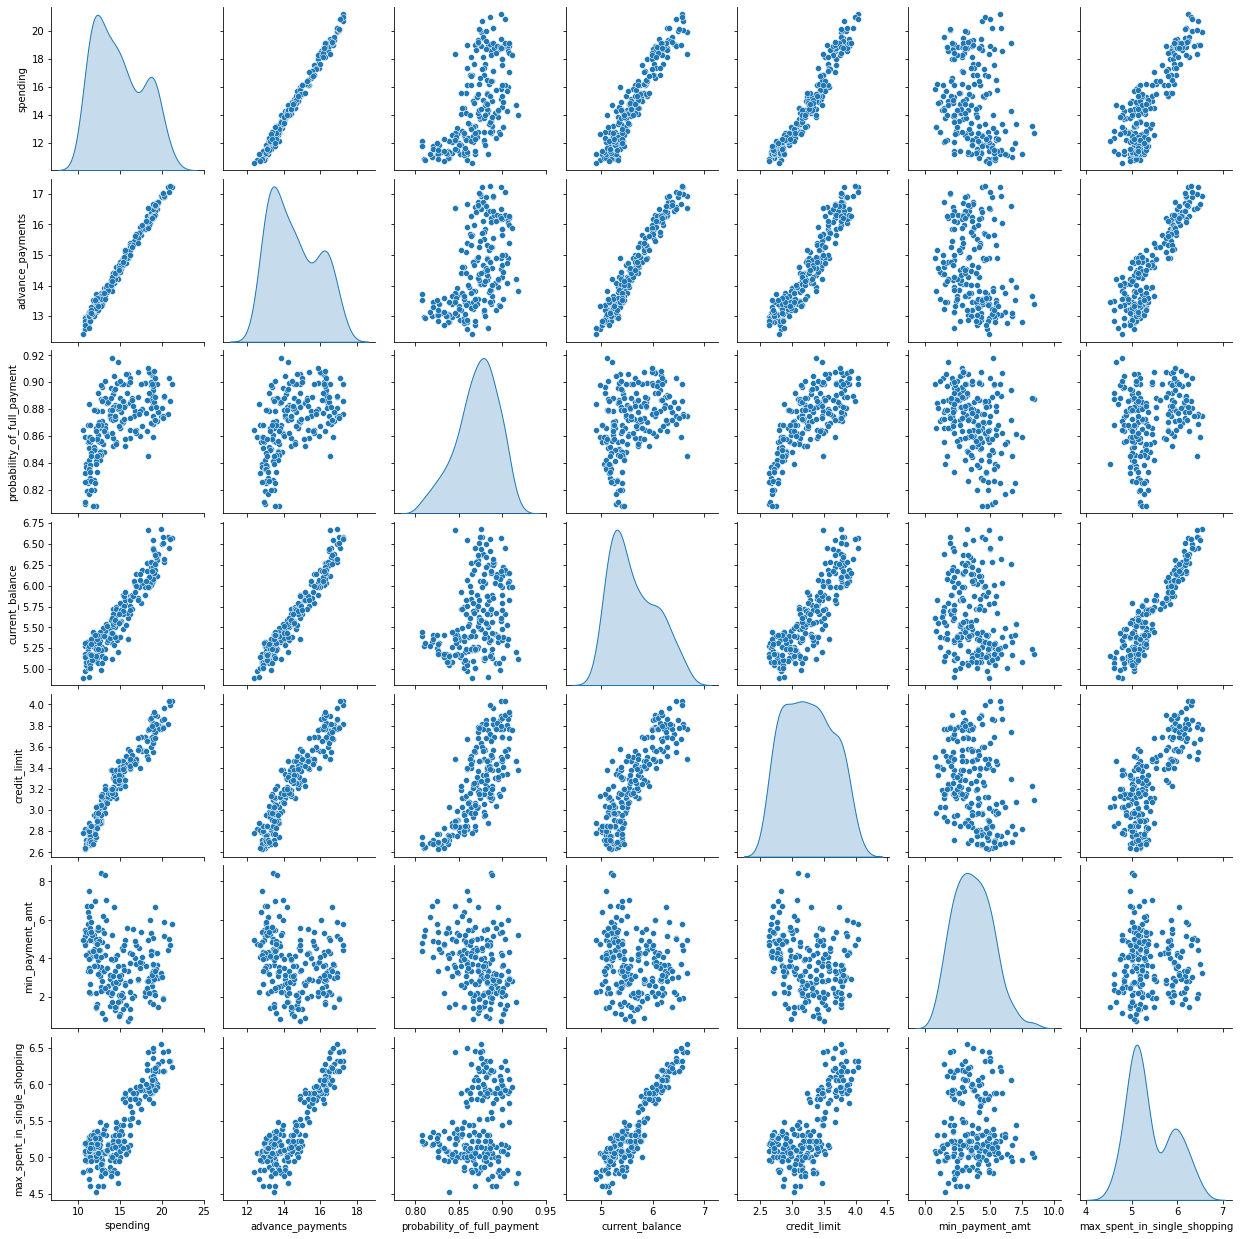

In [46]:
sns.pairplot(df_bank,diag_kind='kde');

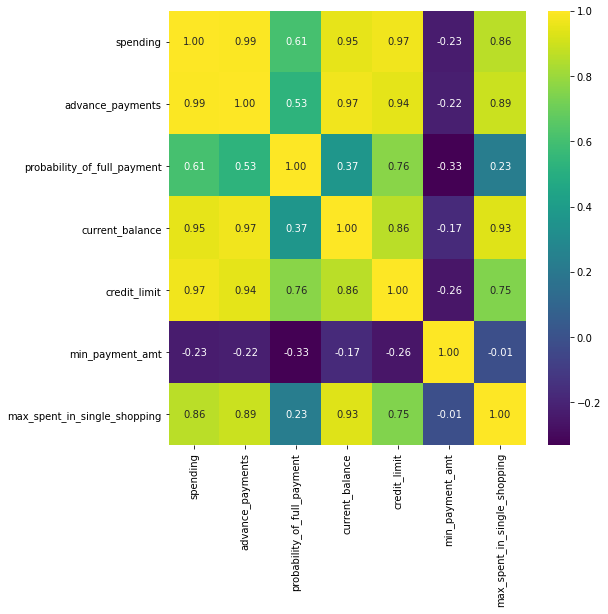

In [51]:
fig = plt.subplots(figsize=(8, 8))
sns.heatmap(df_bank.corr(), annot=True,fmt='.2f', cmap="viridis")
plt.show()

### Treating outliers:
We choose to treat the outliers with Inter quartile range (IQR) method, instead of dropping them, as we will lose other column info and also there outlier are present only in two avariables.

In [4]:
df_n=df_bank.copy()

In [5]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [6]:
## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df_n['min_payment_amt'])
print("lower range",lr, "and upper range", ur)

lower range -0.7493749999999992 and upper range 8.079625


In [7]:
df_n['min_payment_amt']=np.where(df_n['min_payment_amt']>ur,ur,df_n['min_payment_amt'])
df_n['min_payment_amt']=np.where(df_n['min_payment_amt']<lr,lr,df_n['min_payment_amt'])

In [8]:
## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df_n['probability_of_full_payment'])
print("lower range",lr, "and upper range", ur)

lower range 0.8105875 and upper range 0.9340875


In [9]:
df_n['probability_of_full_payment']=np.where(df_n['probability_of_full_payment']>ur,ur,df_n['probability_of_full_payment'])
df_n['probability_of_full_payment']=np.where(df_n['probability_of_full_payment']<lr,lr,df_n['probability_of_full_payment'])

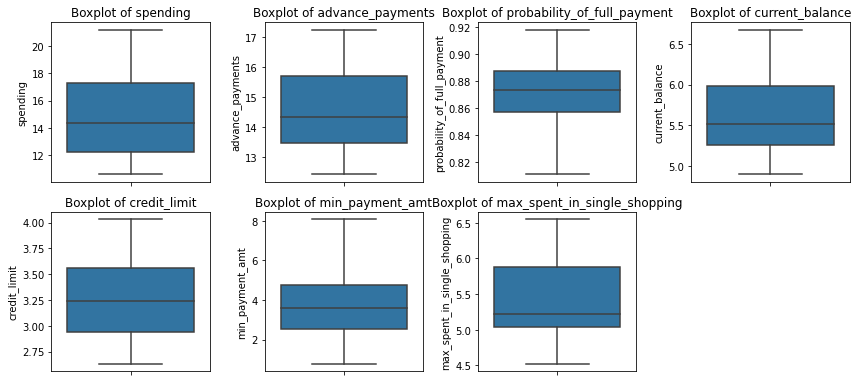

In [10]:
#Check to verify if outliers have been treated
plt.figure(figsize = (12,8))
feature_list = df_n.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df_n[feature_list[i]], data = df_n)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [117]:
df_bank_nw=df_bank.copy()

In [119]:
Q1=df_bank['min_payment_amt'].quantile(q=0.25)
Q3=df_bank['min_payment_amt'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in min_payment_amt: ', L_outliers)
print('Upper outliers in min_payment_amt: ', U_outliers)
print('Number of outliers in min_payment_amt upper : ', df_bank[df_bank['min_payment_amt']>8.0796]['min_payment_amt'].count())
print('Number of outliers in min_payment_amt lower : ', df_bank[df_bank['min_payment_amt']<-0.7494]['min_payment_amt'].count())

Lower outliers in min_payment_amt:  -0.7493749999999992
Upper outliers in min_payment_amt:  8.079625
Number of outliers in min_payment_amt upper :  2
Number of outliers in min_payment_amt lower :  0


In [122]:
print(df_bank_nw['min_payment_amt'].quantile(0.50)) 
print(df_bank_nw['min_payment_amt'].quantile(0.95)) 
df_bank_nw['min_payment_amt'] = np.where(df_bank_nw['min_payment_amt'] > 6.1777, 3.599, df_bank_nw['min_payment_amt'])

3.599
6.1777999999999995


In [124]:
print(df_bank_nw['probability_of_full_payment'].quantile(0.50)) 
print(df_bank_nw['probability_of_full_payment'].quantile(0.95)) 
df_bank_nw['probability_of_full_payment'] = np.where(df_bank_nw['probability_of_full_payment'] > 0.90533, 0.87345, df_bank_nw['probability_of_full_payment'])

0.8734500000000001
0.90533


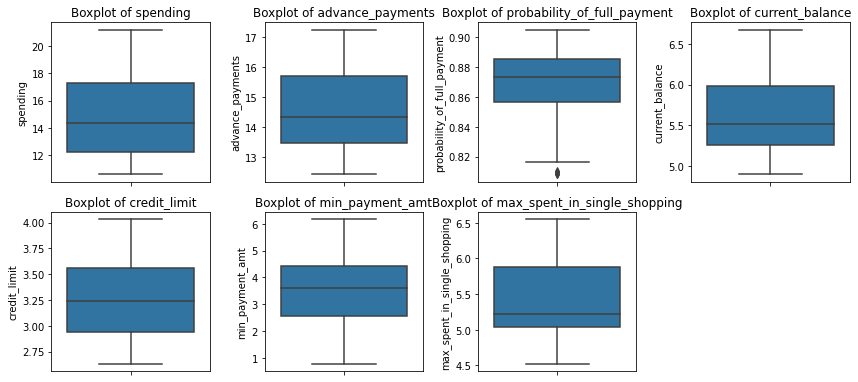

In [130]:
#Check to verify if outliers have been treated
plt.figure(figsize = (12,8))
feature_list = df_bank_nw.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df_bank_nw[feature_list[i]], data = df_bank_nw)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### 1.2 Do you think scaling is necessary for clustering in this case? Justify

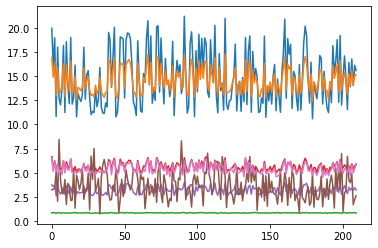

In [131]:
# prior to scaling 
plt.plot(df_bank)
plt.show()

In [11]:
# Scaling

from scipy.stats import zscore
df_bank_Scaled=df_n.apply(zscore)
df_bank_Scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


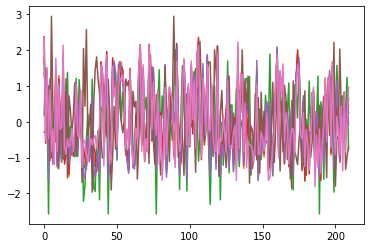

In [12]:
# after scaling 
plt.plot(df_bank_Scaled)
plt.show()

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

### ward's method

In [14]:
wardlink = linkage(df_bank_Scaled, method = 'ward')

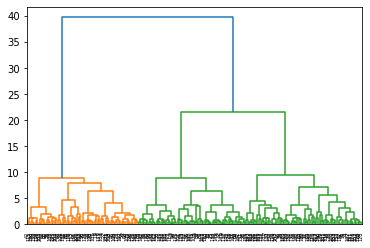

In [15]:
dend = dendrogram(wardlink)

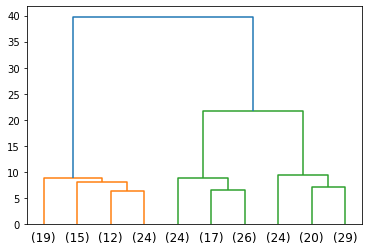

In [16]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10)

In [17]:
from scipy.cluster.hierarchy import fcluster

In [18]:
# Setting criterion as maxclust,with 3 clusters, and storing the result in another object 'clusters_ward'

clusters_ward = fcluster(wardlink, 3, criterion='maxclust')
clusters_ward

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [19]:
df_cluster=df_n.copy()

In [20]:
df_cluster['clusters_ward'] = clusters_ward

In [21]:
#Appending cluster to the original dataset
df_cluster.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_ward
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [22]:
#Cluster Frequency
df_cluster['clusters_ward'].value_counts().sort_index()

1    70
2    67
3    73
Name: clusters_ward, dtype: int64

In [23]:
#Cluster Profiles
aggdata=df_cluster.iloc[:,:8].groupby('clusters_ward').mean()
aggdata['Freq']=df_cluster['clusters_ward'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters_ward,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


### average linkage method

In [24]:
link_method = linkage(df_bank_Scaled, method = 'average')

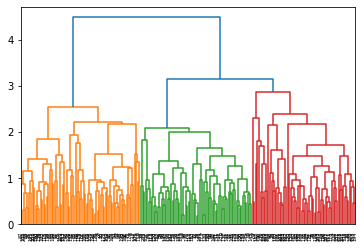

In [26]:
dend = dendrogram(link_method)

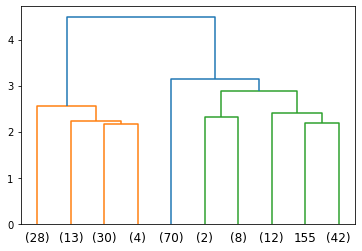

In [27]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10)

In [28]:
from scipy.cluster.hierarchy import fcluster

In [29]:
# Setting criterion as maxclust,with 3 clusters, and storing the result in another object 'clusters3'

clusters_3 = fcluster(link_method, 3, criterion='maxclust')
clusters_3

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [30]:
df_cluster1=df_n.copy()

In [31]:
df_cluster1['clusters-3'] = clusters_3

In [32]:
#Appending cluster to the original dataset
df_cluster1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-3
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [33]:
#Cluster Frequency
df_cluster1['clusters-3'].value_counts().sort_index()

1    75
2    70
3    65
Name: clusters-3, dtype: int64

In [34]:
#Cluster Profiles
aggdata=df_cluster1.iloc[:,:8].groupby('clusters-3').mean()
aggdata['Freq']=df_cluster1['clusters-3'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-3,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846845,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.759007,5.055569,65


In [35]:
#Using Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

In [36]:
# Set n_clusters=3,affinity='euclidean', linkage='average' and store the result in another object 'Cluster_agglo'

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(df_bank_Scaled.iloc[:,:8])
print(Cluster_agglo)

[1 0 1 2 1 0 2 2 1 2 1 1 2 1 0 0 0 2 2 2 2 2 1 2 0 1 0 2 2 2 2 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 1 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 1 1 1 1 0 0 1 0 2 2 1 1 1 2 1 0 1 0 1 0 1 1 2 0 1 1
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 2 2 1 2
 0 2 0 2 0 1 0 0 2 2 0 1 1 2 1 1 1 2 1 0 0 2 0 2 0 1 1 1 0 2 0 2 0 2 0 0 1
 1 0 1 0 2 0 0 2 1 0 1 1 2 1 2 0 0 0 2 1 0 1 0 0 1]


In [37]:
#Appending clusters to original dataset
df_cluster1["Agglo_CLusters"]=Cluster_agglo

In [38]:
# Agglomerative Cluster Frequency
df_cluster1.Agglo_CLusters.value_counts().sort_index()

0    65
1    75
2    70
Name: Agglo_CLusters, dtype: int64

In [39]:
#Agglomeraive Cluster Profiles
agglo_data=df_cluster1.drop(['clusters-3'],axis=1).groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df_cluster1.Agglo_CLusters.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agglo_CLusters,,,,,,,,
0,14.217077,14.195846,0.884869,5.442000,3.253508,2.759007,5.055569,65
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846845,5.258300,2.846000,4.619000,5.115071,70


### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters. 

In [40]:
from sklearn.cluster import KMeans 

In [41]:
k_means2 = KMeans(n_clusters = 2,random_state=1)
k_means2.fit(df_bank_Scaled)
k_means2.inertia_

659.14740095485

In [42]:
k_means3 = KMeans(n_clusters = 3,random_state=1)
k_means3.fit(df_bank_Scaled)
k_means3.inertia_

430.298481751223

In [43]:
k_means4 = KMeans(n_clusters = 4,random_state=1)
k_means4.fit(df_bank_Scaled)
k_means4.inertia_

371.2217639268478

In [44]:
print("K-means.inertia_ for n_cluster=3 is:",k_means3.inertia_)
print('\n')
print("K-means.labels_ for n_cluster=3:",'\n',k_means3.labels_)



K-means.inertia_ for n_cluster=3 is: 430.298481751223


K-means.labels_ for n_cluster=3: 
 [0 2 0 1 0 1 1 2 0 1 0 2 1 0 2 1 2 1 1 1 1 1 0 1 2 0 2 1 1 1 2 1 1 2 1 1 1
 1 1 0 0 2 0 0 1 1 2 0 0 0 1 0 0 0 0 0 1 1 1 0 2 1 1 2 2 0 0 2 0 1 2 1 0 0
 1 0 2 1 0 2 2 2 2 0 1 2 0 2 0 1 2 0 2 1 1 0 0 0 1 0 2 0 2 0 2 0 0 1 1 0 2
 2 0 1 1 0 2 2 1 0 2 1 1 1 2 2 0 1 2 2 1 2 2 0 1 0 0 1 0 2 2 2 1 1 2 1 0 1
 2 1 2 1 2 2 1 2 2 1 2 0 0 1 0 0 0 1 2 2 2 1 2 1 2 0 0 0 2 1 2 1 2 2 2 2 0
 0 1 2 2 1 1 2 1 0 2 0 0 1 0 1 2 0 2 1 0 2 0 2 2 2]


In [45]:
#Within Sum of Squares (WSS) for 2 to 10 clusters
wss =[] 

In [46]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_bank_Scaled)
    wss.append(KM.inertia_)

In [47]:
wss

[1469.999999999999,
 659.14740095485,
 430.298481751223,
 371.2217639268478,
 326.88464076818576,
 290.1513312373964,
 263.0291032947616,
 242.81070733171134,
 221.48759698221107,
 206.3290465077041]

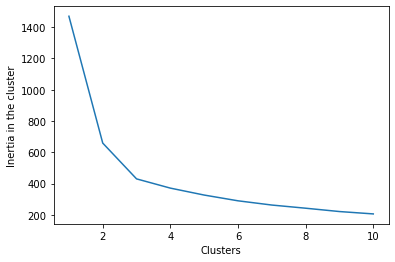

In [48]:
###Plot the Within Sum of Squares (WSS) plot using the values of 'inertia' 
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [49]:
# Cluster evaluation for 3 clusters: the silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score

In [50]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_bank_Scaled)
labels = k_means.labels_
k_means.inertia_

430.298481751223

In [51]:
# Calculating silhouette_score for n_clusters = 3

sil3=silhouette_score(df_bank_Scaled,labels)
print('silhouette_score for n_clusters=3 is:',sil3)

silhouette_score for n_clusters=3 is: 0.4008059221522216


In [52]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_bank_Scaled)
labels1 = k_means.labels_
k_means.inertia_

371.2217639268478

In [53]:
# Calculating silhouette_score n_clusters = 4

sil4=silhouette_score(df_bank_Scaled,labels1)
print('silhouette_score for n_clusters=4 is:',sil4)

silhouette_score for n_clusters=4 is: 0.32943733699973826


silhouette score is better for 3 clusters than for 4 clusters. So, final clusters will be 3

Appending Clusters to the original dataset

In [54]:
df_k=df_n.copy()

In [55]:
df_k["Clus_kmeans3"] = labels
df_k.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans3
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,0


In [56]:
#Cluster Profiling
df_k.Clus_kmeans3.value_counts().sort_index()

0    67
1    72
2    71
Name: Clus_kmeans3, dtype: int64

In [57]:
clust_profile=df_k.groupby('Clus_kmeans3').mean()
clust_profile['freq']=df_k.Clus_kmeans3.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans3,,,,,,,,
0,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
1,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,72
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71


In [58]:
kmeans_mean_cluster = pd.DataFrame(round(df_k.groupby('Clus_kmeans3').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
Clus_kmeans3,,,,,,,
0,18.5,16.2,0.9,6.2,3.7,3.6,6.0
1,11.9,13.2,0.8,5.2,2.8,4.7,5.1
2,14.4,14.3,0.9,5.5,3.3,2.7,5.1


In [59]:
#transposing the cluster
cluster_3_T = kmeans_mean_cluster.T
cluster_3_T 

Clus_kmeans3,0,1,2
spending,18.5,11.9,14.4
advance_payments,16.2,13.2,14.3
probability_of_full_payment,0.9,0.8,0.9
current_balance,6.2,5.2,5.5
credit_limit,3.7,2.8,3.3
min_payment_amt,3.6,4.7,2.7
max_spent_in_single_shopping,6.0,5.1,5.1


### Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.



In [45]:
df_cart=pd.read_csv('insurance_part2_data.csv')

In [8]:
df_cart.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [6]:
df_cart.shape

(3000, 10)

In [89]:
df_cart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [9]:
df_cart.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df_cart.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

Getting unique counts of all Nominal Variables

In [11]:
for column in df_cart[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',df_cart[column].nunique())
    print(df_cart[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




In [4]:
dups = df_cart.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df_cart[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


Removing Duplicates 

In [46]:
df_cart.drop_duplicates(inplace=True) 
dups = df_cart.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df_cart.shape)

Number of duplicate rows = 0
(2861, 10)


### EDA
Univariate/Bivariate analysis

The skewness for Age is: 1.1031446044352335


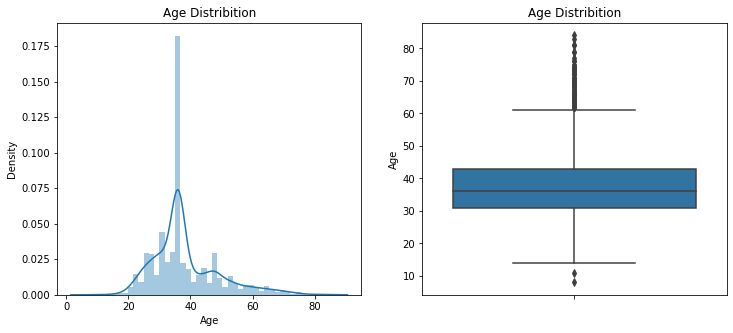

In [15]:
print('The skewness for Age is:',df_cart['Age'].skew())
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.distplot(df_cart['Age'],kde=True, ax=ax1)
sns.boxplot(y='Age', data=df_cart, ax=ax2)
ax1.set_title('Age Distribition')
ax2.set_title('Age Distribition')
            
plt.show()

In [17]:
print('Minimum Age: ', df_cart['Age'].min())
print('Maximum Age: ',df_cart['Age'].max())
print('Mean value: ', df_cart['Age'].mean())
print('Median value: ',df_cart['Age'].median())
print('Standard deviation: ', df_cart['Age'].std())
# IQR=Q3-Q1
#lower = Q1-1.5*IQR
#upper = Q3+1.5*IQR
Q1=df_cart['Age'].quantile(q=0.25)
Q3=df_cart['Age'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Age: ', L_outliers)
print('Upper outliers in Age: ', U_outliers)
print('Number of outliers in Age upper : ', df_cart[df_cart['Age']>61]['Age'].count())
print('Number of outliers in Age lower : ', df_cart[df_cart['Age']<13]['Age'].count())

Minimum Age:  8
Maximum Age:  84
Mean value:  38.204124432016776
Median value:  36.0
Standard deviation:  10.678106340128144
Lower outliers in Age:  13.0
Upper outliers in Age:  61.0
Number of outliers in Age upper :  128
Number of outliers in Age lower :  2


The skewness for Commision is: 3.1047406576922842


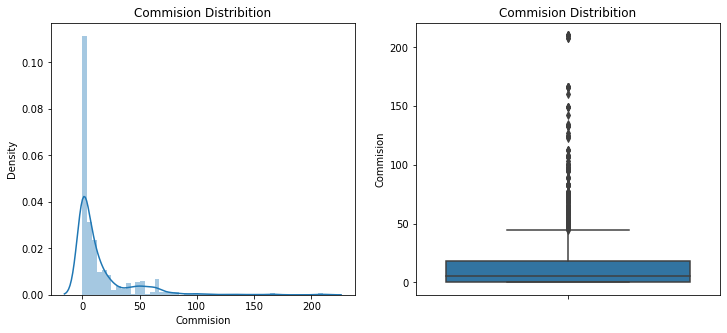

In [63]:
print('The skewness for Commision is:',df_cart['Commision'].skew())
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.distplot(df_cart['Commision'],kde=True, ax=ax1)
sns.boxplot(y='Commision', data=df_cart, ax=ax2)
ax1.set_title('Commision Distribition')
ax2.set_title('Commision Distribition')
            
plt.show()

In [66]:
print('Minimum Age: ', df_cart['Commision'].min())
print('Maximum Age: ',df_cart['Commision'].max())
print('Mean value: ', df_cart['Commision'].mean())
print('Median value: ',df_cart['Commision'].median())
print('Standard deviation: ', df_cart['Commision'].std())
# IQR=Q3-Q1
#lower = Q1-1.5*IQR
#upper = Q3+1.5*IQR
Q1=df_cart['Commision'].quantile(q=0.25)
Q3=df_cart['Commision'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Commision: ', L_outliers)
print('Upper outliers in Commision: ', U_outliers)
print('Number of outliers in Commision upper : ', df_cart[df_cart['Commision']>44.55]['Commision'].count())
print('Number of outliers in Commision lower : ', df_cart[df_cart['Commision']<-26.73]['Commision'].count())

Minimum Age:  0.0
Maximum Age:  210.21
Mean value:  15.080996155190423
Median value:  5.63
Standard deviation:  25.826834110304418
Lower outliers in Commision:  -26.73
Upper outliers in Commision:  44.55
Number of outliers in Commision upper :  354
Number of outliers in Commision lower :  0


The skewness for Duration is: 13.786096073249146


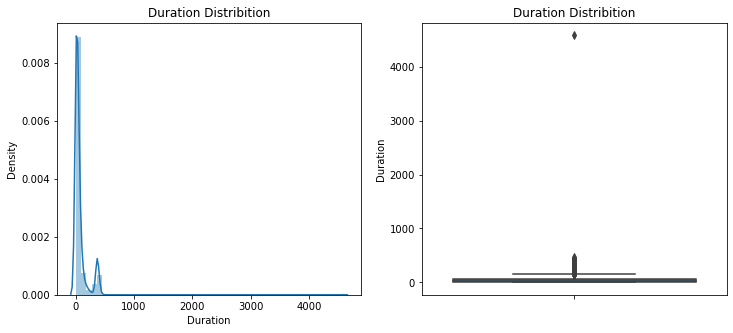

In [67]:
print('The skewness for Duration is:',df_cart['Duration'].skew())
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.distplot(df_cart['Duration'],kde=True, ax=ax1)
sns.boxplot(y='Duration', data=df_cart, ax=ax2)
ax1.set_title('Duration Distribition')
ax2.set_title('Duration Distribition')
            
plt.show()

In [69]:
print('Minimum Age: ', df_cart['Duration'].min())
print('Maximum Age: ',df_cart['Duration'].max())
print('Mean value: ', df_cart['Duration'].mean())
print('Median value: ',df_cart['Duration'].median())
print('Standard deviation: ', df_cart['Duration'].std())
# IQR=Q3-Q1
#lower = Q1-1.5*IQR
#upper = Q3+1.5*IQR
Q1=df_cart['Duration'].quantile(q=0.25)
Q3=df_cart['Duration'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Duration: ', L_outliers)
print('Upper outliers in Duration: ', U_outliers)
print('Number of outliers in Duration upper : ', df_cart[df_cart['Duration']>147.0]['Duration'].count())
print('Number of outliers in Duration lower : ', df_cart[df_cart['Duration']<-69.0]['Duration'].count())

Minimum Age:  -1
Maximum Age:  4580
Mean value:  72.12023767913317
Median value:  28.0
Standard deviation:  135.9771996496429
Lower outliers in Duration:  -69.0
Upper outliers in Duration:  147.0
Number of outliers in Duration upper :  362
Number of outliers in Duration lower :  0


The skewness for Sales is: 2.3446426921667585


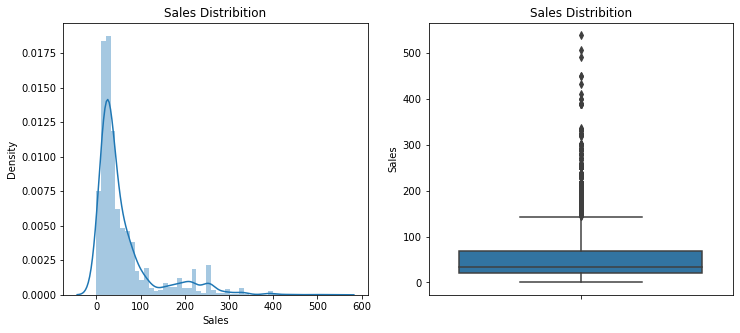

In [70]:
print('The skewness for Sales is:',df_cart['Sales'].skew())
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.distplot(df_cart['Sales'],kde=True, ax=ax1)
sns.boxplot(y='Sales', data=df_cart, ax=ax2)
ax1.set_title('Sales Distribition')
ax2.set_title('Sales Distribition')
            
plt.show()

In [72]:
print('Minimum Age: ', df_cart['Sales'].min())
print('Maximum Age: ',df_cart['Sales'].max())
print('Mean value: ', df_cart['Sales'].mean())
print('Median value: ',df_cart['Sales'].median())
print('Standard deviation: ', df_cart['Sales'].std())
# IQR=Q3-Q1
#lower = Q1-1.5*IQR
#upper = Q3+1.5*IQR
Q1=df_cart['Sales'].quantile(q=0.25)
Q3=df_cart['Sales'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Sales: ', L_outliers)
print('Upper outliers in Sales: ', U_outliers)
print('Number of outliers in Sales upper : ', df_cart[df_cart['Sales']>143.25]['Sales'].count())
print('Number of outliers in Sales lower : ', df_cart[df_cart['Sales']<-53.95]['Sales'].count())

Minimum Age:  0.0
Maximum Age:  539.0
Mean value:  61.757878364208416
Median value:  33.5
Standard deviation:  71.39974021475756
Lower outliers in Sales:  -53.94999999999999
Upper outliers in Sales:  143.25
Number of outliers in Sales upper :  346
Number of outliers in Sales lower :  0


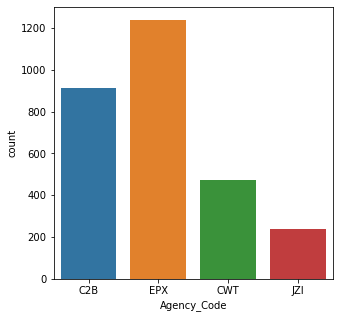

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(data = df_cart, x = 'Agency_Code')
plt.show()

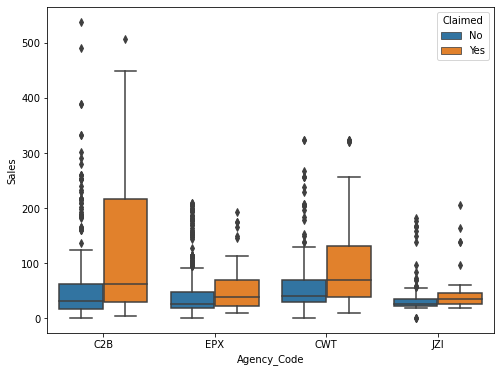

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_cart, x='Agency_Code', y= 'Sales', hue='Claimed')
plt.show()

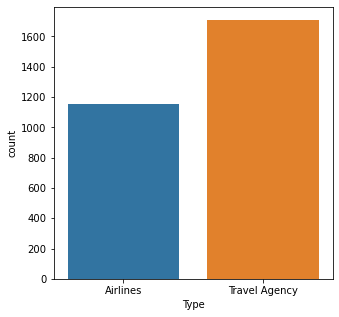

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(data = df_cart, x = 'Type')
plt.show()

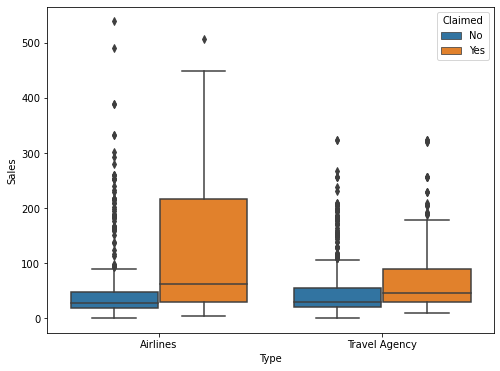

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_cart, x='Type', y= 'Sales', hue='Claimed')
plt.show()

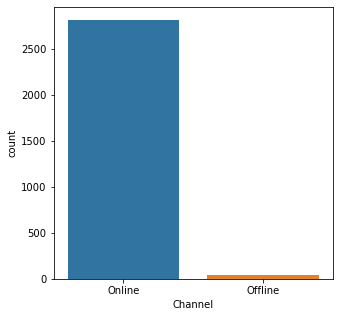

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(data = df_cart, x = 'Channel')
plt.show()

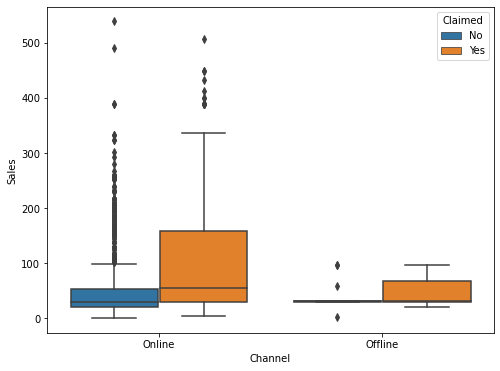

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_cart, x='Channel', y= 'Sales', hue='Claimed')
plt.show()

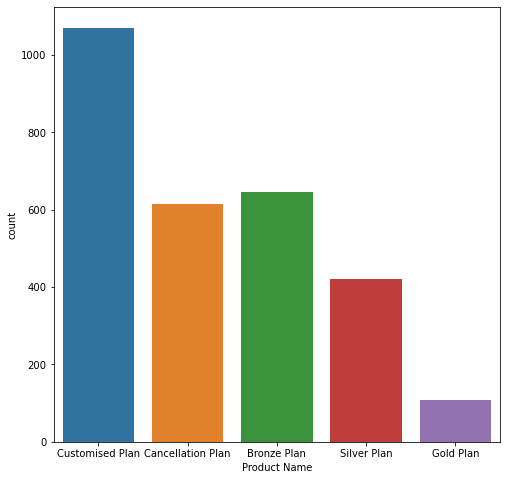

In [19]:
plt.figure(figsize=(8,8))
sns.countplot(data = df_cart, x = 'Product Name')
plt.show()

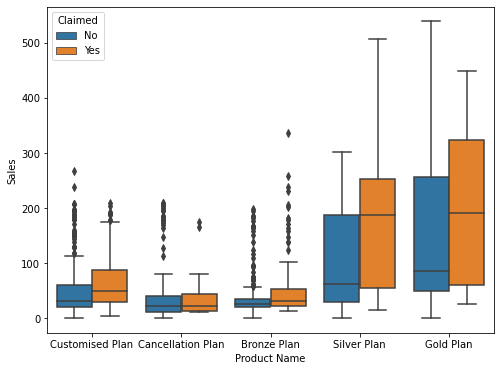

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_cart, x='Product Name', y= 'Sales', hue='Claimed')
plt.show()

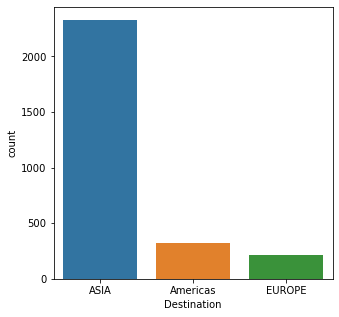

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(data = df_cart, x = 'Destination')
plt.show()

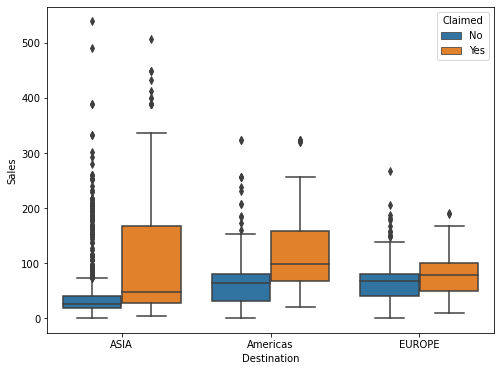

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_cart, x='Destination', y= 'Sales', hue='Claimed')
plt.show()

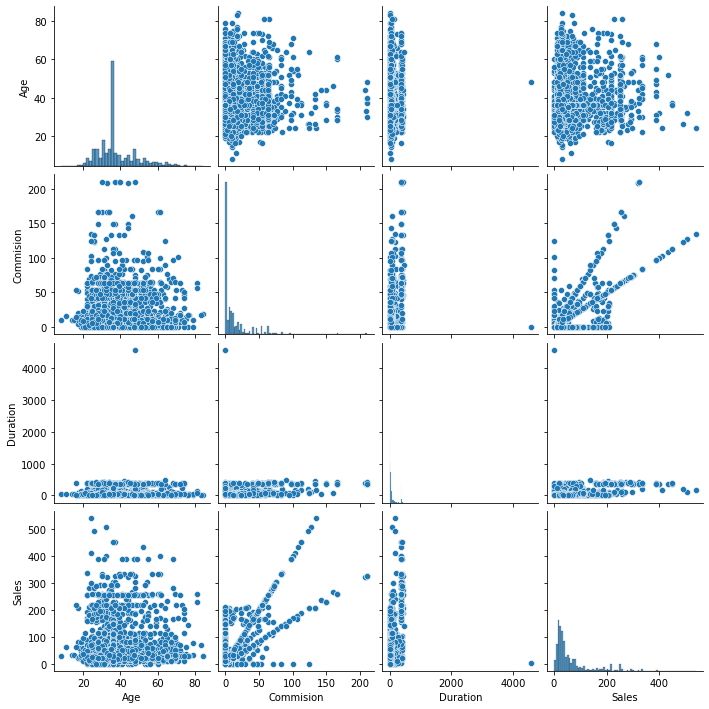

In [24]:
sns.pairplot(df_cart[['Age', 'Commision','Duration', 'Sales']])

<AxesSubplot:>

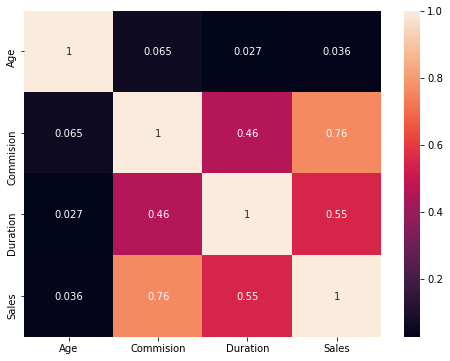

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(df_cart[['Age', 'Commision','Duration', 'Sales']].corr(), annot=True)

Converting all objects to categorical codes


In [47]:
for feature in df_cart.columns: 
     if df_cart[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_cart[feature].unique()))
        print(pd.Categorical(df_cart[feature].unique()).codes)
        df_cart[feature] = pd.Categorical(df_cart[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [48]:
df_cart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 128.5 KB


In [30]:
df_cart.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [34]:
df_cart.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

Extracting the target column into separate vectors for training set and test set

In [49]:
X = df_cart.drop("Claimed", axis=1)

y = df_cart.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


Splitting data into training and test set

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

Checking the dimensions of the training and test data

In [51]:
print('X_train      :',X_train.shape)
print('X_test       :',X_test.shape)
print('train_labels :',train_labels.shape)
print('test_labels  :',test_labels.shape)
print('Total Obs    :',2002+859)

X_train      : (2002, 9)
X_test       : (859, 9)
train_labels : (2002,)
test_labels  : (859,)
Total Obs    : 2861


Percentage split of training and the test set

In [52]:
train_labels.value_counts(normalize=True)

0    0.678821
1    0.321179
Name: Claimed, dtype: float64

In [32]:
test_labels.value_counts(normalize=True)

0    0.684517
1    0.315483
Name: Claimed, dtype: float64

Observations are almost equally distributed between the train and test sets with respect to target classes

 ### Building a Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
# Initialise a Decision Tree Classifier

dt_model = DecisionTreeClassifier(criterion = 'gini',random_state=1 )

In [64]:
# Fit the model

dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [66]:
from sklearn import tree

train_char_label = ['No', 'Yes']
DT_file = open('d:\DT_123.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=DT_file, feature_names = list(X_train), class_names = list(train_char_label))

DT_file.close()

ValueError: Length of feature_names, 2002 does not match number of features, 9

In [59]:
#Checking the features

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### Finding Best Parameters using GridSearch

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,12,14,15],
    'min_samples_leaf': [90,100,110,120], 
    'min_samples_split': [150,200,250,300],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [69]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
print('\n')

best_grid_dtcl = grid_search_dtcl.best_estimator_
print('BEST GRID:','\n',best_grid_dtcl)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 110, 'min_samples_split': 150}


BEST GRID: 
 DecisionTreeClassifier(max_depth=10, min_samples_leaf=110,
                       min_samples_split=150, random_state=1)


###  Regularising the Decision Tree

In [221]:
reg_dt_model= DecisionTreeClassifier(criterion = 'gini', max_depth =10,min_samples_leaf=110,min_samples_split=150)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=110,
                       min_samples_split=150)

### Gernerating Tree with best grid

In [222]:
DTcart_tree_regularized = open('d:\DTcart_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= DTcart_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

DTcart_tree_regularized.close()

In [223]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.629339
Sales         0.282288
Product Name  0.049635
Duration      0.021346
Commision     0.017392
Age           0.000000
Type          0.000000
Channel       0.000000
Destination   0.000000


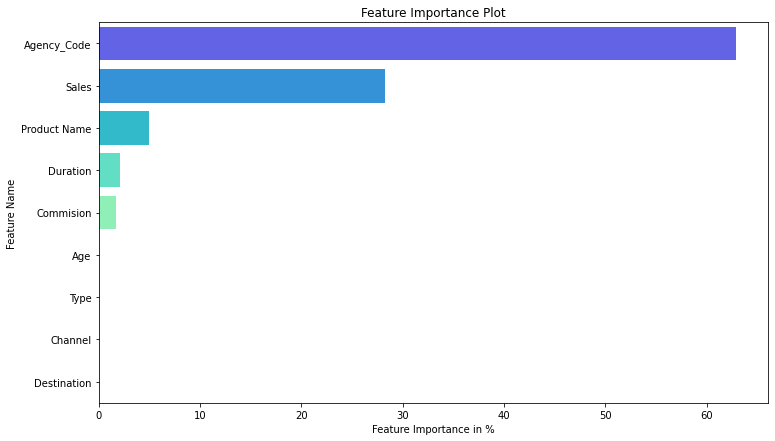

In [224]:
x=pd.DataFrame(reg_dt_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

### Predicting on Training and Test dataset

In [225]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

### Getting the Predicted Probabilities

In [226]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head(8)

,0,1
0,0.573171,0.426829
1,0.974138,0.025862
2,0.271523,0.728477
3,0.676768,0.323232
4,0.676768,0.323232
5,0.780702,0.219298
6,0.974138,0.025862
7,0.573171,0.426829


### Building a Decision Tree Classifier Model and fit it on the Training Set

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve

In [ ]:
models_names={dtc:'DecisionTreeClassifier'}

print('Accuracy for {} model is'.format(models_names[dtc]),'\n',accuracy_score(y_train,prediction_dtc))
print('\n')
print('Classification report for {} model is'.format(models_names[dtc]),'\n',classification_report(y_train,prediction_dtc))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[dtc]))
sns.heatmap(confusion_matrix(y_train,prediction_dtc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[dtc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### Building a Random Forest Classifier

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rfcl = RandomForestClassifier(n_estimators = 500,random_state=1)
rfcl = rfcl.fit(X_train, train_labels)

In [17]:
rfcl

RandomForestClassifier(n_estimators=500, random_state=1)

### Performing Grid Search to find the best parameters

In [20]:
param_grid = {
    'max_depth': [4,5,6],
    'max_features': [3,4,5,6],
    'min_samples_leaf': [8,9,11,15],
    'min_samples_split': [45,50,55],
    'n_estimators': [300,400,500]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)


In [23]:
grid_search_rfcl.fit(X_train, train_labels)
print(grid_search_rfcl.best_params_)
print('\n')

best_grid_rfcl = grid_search_rfcl.best_estimator_
print('BEST GRID:','\n',best_grid_rfcl)


{'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 8, 'min_samples_split': 55, 'n_estimators': 400}


BEST GRID: 
 RandomForestClassifier(max_depth=6, max_features=5, min_samples_leaf=8,
                       min_samples_split=55, n_estimators=400, random_state=1)


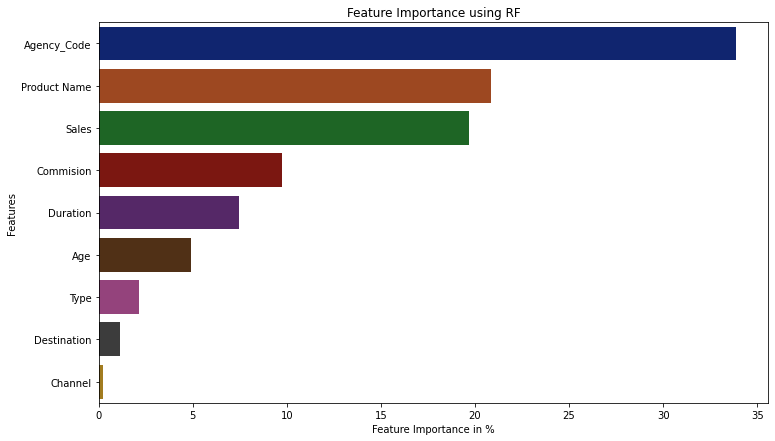

In [26]:
x=pd.DataFrame(best_grid_rfcl.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

In [27]:
print (pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.338848
Product Name  0.208443
Sales         0.196814
Commision     0.097273
Duration      0.074597
Age           0.049054
Type          0.021547
Destination   0.011255
Channel       0.002169


### Predicting the Training and Testing data

In [25]:
ytrain_predict_r = best_grid_rfcl.predict(X_train)
ytest_predict_r = best_grid_rfcl.predict(X_test)

### Building a Neural Network Classifier